### **| MBA DSA 2024**
### **| Inteligência Artificial para predição de acidentes de trânsito na rodovia BR-101**
##### **| Análise de dados de acidentes ocorridos entre 2018 e 2023**
###### | Dataset disponível em: <https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf>

#### 1 - Pré-Processamento (Preprocessing):
  
#### |Dados parcialmente filtrados e não tratados (raw data):
##### Importação das Bibliotecas para análise exploratória de dados:


In [3]:
''' Importação das Bibliotecas para análise dos dados:'''

# Tratamento de dados:
import pandas as pd
import numpy as np

# Plotagem de Dados:
import matplotlib.pyplot as plt
#import plotly.offline as py
#import plotly.graph_objects as go
import seaborn as sns

# Enriquecimento de Dados: 
import twint
import nest_asyncio

# Dados Cartográficos:
from folium.plugins import HeatMap
import folium

#Nuvem de Palavras: 
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

#para analise multivariada/bivariada
import itertools

# Importando as bibliotecas necessárias para encotrar outliers, linhas duplicadas... e para a separação de dados
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split


##### Importação do dataset filtrado com dados da BR-101 entre 2018 a 2023 utilizando a biblioteca Pandas:


In [4]:
''' Importação do dataset filtrado com dados da BR-101 entre 2018 a 2023'''
df_filtrado101 = pd.read_csv('C:/Users/filipe/anaconda3/envs/tccdsa1/ProjetoF2/df_filtrado101.csv', sep=',', encoding='utf-8', low_memory=False)


In [5]:
# Mostrando as primeiras linhas do DataFrame filtrado. Agora todos os dados são referentes à rodovia BR-101:   
print(df_filtrado101.head())


        id     pesid data_inversa     dia_semana   horario  uf     br     km  \
0  99994.0  216306.0   2018-01-01  segunda-feira  02:30:00  SC  101.0   32,2   
1  99994.0  216306.0   2018-01-01  segunda-feira  02:30:00  SC  101.0   32,2   
2  99995.0  216702.0   2018-01-01  segunda-feira  01:40:00  RN  101.0  110,8   
3  99996.0  216307.0   2018-01-01  segunda-feira  02:20:00  SC  101.0  348,1   
4  99996.0  216309.0   2018-01-01  segunda-feira  02:20:00  SC  101.0  348,1   

    municipio causa_principal  ...       sexo  ilesos feridos_leves  \
0   JOINVILLE             Sim  ...  Masculino       1             0   
1   JOINVILLE             Sim  ...  Masculino       1             0   
2  PARNAMIRIM             Sim  ...  Masculino       0             1   
3   JAGUARUNA             Sim  ...  Masculino       1             0   
4   JAGUARUNA             Sim  ...   Feminino       0             1   

  feridos_graves mortos      latitude     longitude regional delegacia  \
0              0  

In [6]:
# Imprimir a quantidade de linhas e colunas
print(f"Shape: O DataFrame possui {df_filtrado101.shape[0]} linhas e {df_filtrado101.shape[1]} colunas.\n")


Shape: O DataFrame possui 308203 linhas e 37 colunas.



##### Análise Exploratória e Limpeza de Dados

##### Removendo colunas que não serão utilizadas:  

In [7]:
# Para eliminar colunas, o método "drop()" foi usado. As colunas 'marca', 'ano_fabricacao_veiculo', 'regional', 'delegacia', 'uop', 'id', 'pesid', 'id_veiculo', 'estado_fisico', 'causa_principal' e 'ordem_tipo_acidente'  foram removidas:
df_filtrado101 = df_filtrado101.drop(columns=['marca', 'ano_fabricacao_veiculo', 'regional', 'delegacia', 'uop', 'id', 'pesid', 'id_veiculo', 'estado_fisico', 'causa_principal', 'ordem_tipo_acidente'])

# Mostrando as primeiras linhas do DataFrame filtrado, apenas com as colunas que serão utilizadas:   
df_filtrado101.head(2)


,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,...,tipo_veiculo,tipo_envolvido,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude
0,2018-01-01,segunda-feira,02:30:00,SC,101.0,"32,2",JOINVILLE,Falta de Atenção à Condução,Saída de leito carroçável,Sem Vítimas,...,Caminhonete,Condutor,69.0,Masculino,1,0,0,0,"-26,25144272","-48,90725875"
1,2018-01-01,segunda-feira,02:30:00,SC,101.0,"32,2",JOINVILLE,Falta de Atenção à Condução,Colisão com objeto estático,Sem Vítimas,...,Caminhonete,Condutor,69.0,Masculino,1,0,0,0,"-26,25144272","-48,90725875"


##### Organizando as colunas: 


In [8]:
# Para facilitar a separação de dados nas próximas etapas, as colunas foram organizadas: 

# Movendo a coluna 'mortos' para a última coluna do dataframe:
colunas = df_filtrado101.columns.tolist()  # Obtém uma lista de todas as colunas
colunas.remove('mortos')  # Remove a coluna que será movida
colunas.append('mortos')  # Adiciona a coluna movida ao final da lista do dataframe

df_organizado = df_filtrado101.reindex(columns=colunas)  # Reorganiza as colunas do DataFrame


# Mostrando as primeiras linhas do DataFrame com os dados referentes à rodovia BR-101:   
df_organizado.head(2)


,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,...,tipo_veiculo,tipo_envolvido,idade,sexo,ilesos,feridos_leves,feridos_graves,latitude,longitude,mortos
0,2018-01-01,segunda-feira,02:30:00,SC,101.0,"32,2",JOINVILLE,Falta de Atenção à Condução,Saída de leito carroçável,Sem Vítimas,...,Caminhonete,Condutor,69.0,Masculino,1,0,0,"-26,25144272","-48,90725875",0
1,2018-01-01,segunda-feira,02:30:00,SC,101.0,"32,2",JOINVILLE,Falta de Atenção à Condução,Colisão com objeto estático,Sem Vítimas,...,Caminhonete,Condutor,69.0,Masculino,1,0,0,"-26,25144272","-48,90725875",0


##### Encontrando linhas com valores ausentes 


In [9]:
# Verificando a quantidade de dados ausentes e linhas duplicadas. 
# Usando a imputação multivariada para substituir os dados ausentes. Técnica estatística usada para substituir os valores ausentes em um conjunto de dados com base nas relações entre as variáveis. Em vez de preencher os valores ausentes com uma medida de tendência central como a média ou a moda (imputação univariada), a imputação multivariada usa todo o conjunto de dados disponível para estimar os valores ausentes.

# Verificando dados ausentes no dataset
print("Dados ausentes por coluna:")
print(df_organizado.isnull().sum())



Dados ausentes por coluna:
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                            0
km                            0
municipio                     0
causa_acidente                0
tipo_acidente                 5
classificacao_acidente        0
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
tipo_veiculo                  0
tipo_envolvido                0
idade                     48887
sexo                          0
ilesos                        0
feridos_leves                 0
feridos_graves                0
latitude                      0
longitude                     0
mortos                        0
dtype: int64


##### Tratamento para as linhas com dados ausentes

In [10]:
# Substituindo dados ausentes com a imputação multivariada
# Primeiro, separar as colunas numéricas das não numéricas
numeric_cols = df_organizado.select_dtypes(include=[np.number]).columns
non_numeric_cols = df_organizado.select_dtypes(exclude=[np.number]).columns

# Agora, vamos aplicar a imputação apenas nas colunas numéricas
imputer = IterativeImputer()
df_organizado[numeric_cols] = imputer.fit_transform(df_organizado[numeric_cols])

# Como há apenas 5 linhas com valores ausentes na variável 'tipo_acidente', podemos removê-las, uma vez que a proporção de dados ausentes é muito pequena em relação ao tamanho do conjunto de dados.
# Remover linhas com valores ausentes na coluna 'tipo_acidente'
df_organizado = df_organizado.dropna(subset=['tipo_acidente'])

# Verificar novamente os dados ausentes
print("Dados ausentes por coluna após a filtragem:")
print(df_organizado.isnull().sum())



Dados ausentes por coluna após a filtragem:
data_inversa              0
dia_semana                0
horario                   0
uf                        0
br                        0
km                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
sentido_via               0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
tipo_veiculo              0
tipo_envolvido            0
idade                     0
sexo                      0
ilesos                    0
feridos_leves             0
feridos_graves            0
latitude                  0
longitude                 0
mortos                    0
dtype: int64


##### Encontrando linhas duplicadas 

In [11]:
# Verificando linhas duplicadas
print("Número de linhas duplicadas:")
print(df_organizado.duplicated().sum())


Número de linhas duplicadas:
19541


##### Removendo linhas duplicadas

In [12]:
# Excluindo linhas duplicadas
# Para ter apenas entradas únicas no conjunto de dados usaremos o método drop_duplicates() do Pandas para fazer isso
df_organizado = df_organizado.drop_duplicates()

# Verificando linhas duplicadas após a remoção
print("Número de linhas duplicadas após a remoção:")
print(df_organizado.duplicated().sum())

Número de linhas duplicadas após a remoção:
0


##### Encontrando outliers

In [13]:
# Verificando outliers usando o método do Intervalo interquartil (IQR)
Q1 = df_organizado[numeric_cols].quantile(0.25)
Q3 = df_organizado[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
print("Número de outliers por coluna:")
print(((df_organizado[numeric_cols] < (Q1 - 1.5 * IQR)) | (df_organizado[numeric_cols] > (Q3 + 1.5 * IQR))).sum())

# Substituindo outliers com a mediana
#for col in numeric_cols:
#    Q1 = df_organizado[col].quantile(0.25)
#    Q3 = df_organizado[col].quantile(0.75)
#    IQR = Q3 - Q1
#    median = df_organizado[col].median()
#    df_organizado.loc[((df_organizado[col] < (Q1 - 1.5 * IQR)) | (df_organizado[col] > (Q3 + 1.5 * IQR))), col] = median


Número de outliers por coluna:
br                    0
idade              7967
ilesos                0
feridos_leves         0
feridos_graves    33543
mortos             9400
dtype: int64


##### Removendo outliers: 

In [14]:
# Criando uma cópia do dataframe original
df_copia = df_organizado.copy()

# Calculando a mediana e o MAD de cada coluna numérica
mediana = df_copia[numeric_cols].median()
mad = np.abs(df_copia[numeric_cols] - mediana).median()

# Definindo o fator de multiplicação para o MAD
fator = 10

# Calculando os limites superior e inferior para cada coluna usando o Método de Tukey
limite_superior = mediana + fator * mad
limite_inferior = mediana - fator * mad

# Ajustando os limites para as colunas "ilesos", "feridos_leves", "feridos_graves" e "mortos"
limite_superior['ilesos'] = 1
limite_superior['feridos_leves'] = 1
limite_superior['feridos_graves'] = 1
limite_superior['mortos'] = 1

# Ajustando os limites para a coluna "idade"
limite_inferior['idade'] = 1
limite_superior['idade'] = 90

# Aplicando a filtragem em cada coluna numérica individualmente
for col in numeric_cols:
    df_copia = df_copia[(df_copia[col] >= limite_inferior[col]) & (df_copia[col] <= limite_superior[col])]

# Verificando se há outliers após a filtragem
print("Número de outliers por coluna após a filtragem:")
for col in numeric_cols:
    print(f"{col}: {((df_copia[col] < limite_inferior[col]) | (df_copia[col] > limite_superior[col])).sum()}")


Número de outliers por coluna após a filtragem:
br: 0
idade: 0
ilesos: 0
feridos_leves: 0
feridos_graves: 0
mortos: 0


##### Análise Exploratória dos dados tratados: 
##### **1.2 Descrição dos dados:**


In [15]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288010 entries, 0 to 308202
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   data_inversa            288010 non-null  object 
 1   dia_semana              288010 non-null  object 
 2   horario                 288010 non-null  object 
 3   uf                      288010 non-null  object 
 4   br                      288010 non-null  float64
 5   km                      288010 non-null  object 
 6   municipio               288010 non-null  object 
 7   causa_acidente          288010 non-null  object 
 8   tipo_acidente           288010 non-null  object 
 9   classificacao_acidente  288010 non-null  object 
 10  fase_dia                288010 non-null  object 
 11  sentido_via             288010 non-null  object 
 12  condicao_metereologica  288010 non-null  object 
 13  tipo_pista              288010 non-null  object 
 14  tracado_via             2

#### Características gerais do datast:

In [16]:
# Usando o método describe nas colunas numéricas
df_copia[numeric_cols].describe()


,br,idade,ilesos,feridos_leves,feridos_graves,mortos
count,288010.0,288010.000000,288010.000000,288010.000000,288010.000000,288010.000000
mean,101.0,38.437390,0.393931,0.346370,0.115927,0.032454
std,0.0,13.352607,0.488621,0.475814,0.320137,0.177202
min,101.0,1.000000,0.000000,0.000000,0.000000,0.000000
25%,101.0,29.000000,0.000000,0.000000,0.000000,0.000000
50%,101.0,39.000000,0.000000,0.000000,0.000000,0.000000
75%,101.0,45.000000,1.000000,1.000000,0.000000,0.000000
max,101.0,90.000000,1.000000,1.000000,1.000000,1.000000


##### Conferindo novamente o intervalo de valores em cada coluna numérica

In [17]:
# Para ver o intervalo de valores em cada coluna
for col in df_copia.columns:
    if pd.api.types.is_numeric_dtype(df_copia[col]):
        print(f"{col}: {df_copia[col].min()} - {df_copia[col].max()}")


br: 101.0 - 101.0
idade: 1.0 - 90.0
ilesos: 0.0 - 1.0
feridos_leves: 0.0 - 1.0
feridos_graves: 0.0 - 1.0
mortos: 0.0 - 1.0


#### Análise univariada: verificando a distribuição das variáveis numéricas


In [18]:
# Verificar os tipos de dados de cada coluna
tipos_de_dados = df_copia.dtypes

# Exibir os tipos de dados de cada coluna
print("Tipos de Dados por Coluna:")
print(tipos_de_dados)


## Imprimir estatísticas descritivas para todas as colunas
print("Estatísticas Descritivas para Todas as Colunas:")
print(df_copia.describe())

# Iterar sobre todas as colunas do DataFrame
for coluna in df_copia.columns:
    # Verificar se a coluna contém dados numéricos
    if pd.api.types.is_numeric_dtype(df_copia[coluna]):
    
        # Imprimir estatísticas descritivas para a coluna
        print(f"\nEstatísticas descritivas para a coluna '{coluna}':")
        print(df_copia[coluna].describe())


Tipos de Dados por Coluna:
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                        float64
km                         object
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
tipo_veiculo               object
tipo_envolvido             object
idade                     float64
sexo                       object
ilesos                    float64
feridos_leves             float64
feridos_graves            float64
latitude                   object
longitude                  object
mortos                    float64
dtype: object
Estatísticas Descritivas para Todas as Colunas:
             br          id

#### Criando gráficos de barras para algumas das variáveis


 Parece que há valores não numéricos nas colunas de latitude e longitude, o que está causando o erro. Vamos corrigir isso convertendo essas colunas para tipos numéricos antes de criar o gráfico. Além disso, vamos utilizar um gráfico de dispersão simples:
 Neste código, adicionamos a conversão das colunas de latitude e longitude para tipos numéricos e removemos as linhas com valores nulos nessas colunas. Isso deve evitar o erro relacionado ao tipo de dado e proporcionar um gráfico de dispersão mais simples e mais rápido de ser plotado.

##### Número de acidentes de trânsito em determinado mês/ano e Número acumulado de acidentes de trânsito até determinado mês/ano: 

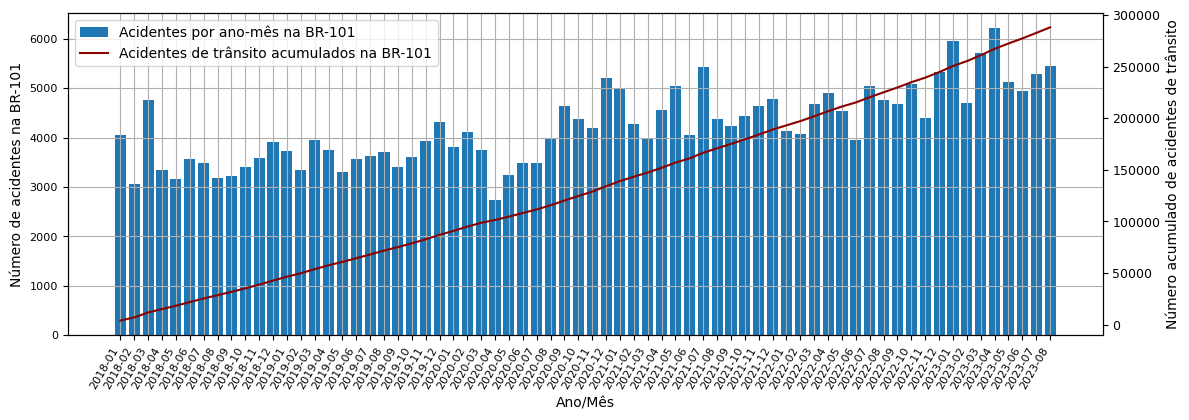

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Converter a coluna 'data_inversa' para o tipo datetime
df_copia['data_inversa'] = pd.to_datetime(df_copia['data_inversa'])

# Criar uma nova coluna 'ano_mes' que representa o ano e o mês do acidente
df_copia['ano_mes'] = df_copia['data_inversa'].dt.to_period('M')

# Contar o número de acidentes por mês
acidentes_por_mes = df_copia['ano_mes'].value_counts().sort_index()

# Calcular o número acumulado de acidentes
acidentes_acumulados = acidentes_por_mes.cumsum()

# Converter o índice para string
acidentes_por_mes.index = acidentes_por_mes.index.astype(str)
acidentes_acumulados.index = acidentes_acumulados.index.astype(str)

# Criar uma figura com dois eixos y e tamanho maior
fig, ax1 = plt.subplots(figsize=(12, 4.3))

# Plotar o número de acidentes por mês
ax1.bar(acidentes_por_mes.index, acidentes_por_mes, label='Acidentes por ano-mês na BR-101')
ax1.set_ylabel('Número de acidentes na BR-101')
ax1.set_xlabel('Ano/Mês')

# Adicionar grid
ax1.grid(True)

# Ajustar os rótulos do eixo x para evitar sobreposição e reduzir o tamanho da fonte
plt.xticks(rotation=60, ha='right', fontsize=3)  # Ajuste de tamanho da fonte

# Ajustar tamanho da fonte dos rótulos nos eixos x e y
ax1.tick_params(axis='both', which='major', labelsize=8)
ax1.tick_params(axis='both', which='minor', labelsize=8)

# Criar o segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()
ax2.plot(acidentes_acumulados.index, acidentes_acumulados, color='darkred', label='Acidentes de trânsito acumulados na BR-101')
ax2.set_ylabel('Número acumulado de acidentes de trânsito')

# Adicionar grid
#ax2.grid(True)

# Ajustar tamanho da fonte dos rótulos nos eixos x e y
ax2.tick_params(axis='both', which='major', labelsize=9)
ax2.tick_params(axis='both', which='minor', labelsize=9)

# Adicionar legendas
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


##### Os dez meses com maior índice de registro de acidentes de trânsito na BR-101:

In [20]:
top_10_meses = acidentes_por_mes.sort_values(ascending=False).head(10)
print(top_10_meses)


ano_mes
2023-04    6221
2023-01    5952
2023-03    5719
2023-08    5442
2021-07    5436
2022-12    5324
2023-07    5280
2020-12    5210
2023-05    5135
2022-10    5096
Name: count, dtype: int64


##### Número de acidentes de trânsito em determinado trimestre/ano e Número acumulado de acidentes de trânsito até determinado trimestre/ano: 

##### Número de acidentes de trânsito em determinado ano e Número acumulado de acidentes de trânsito até determinado ano: 

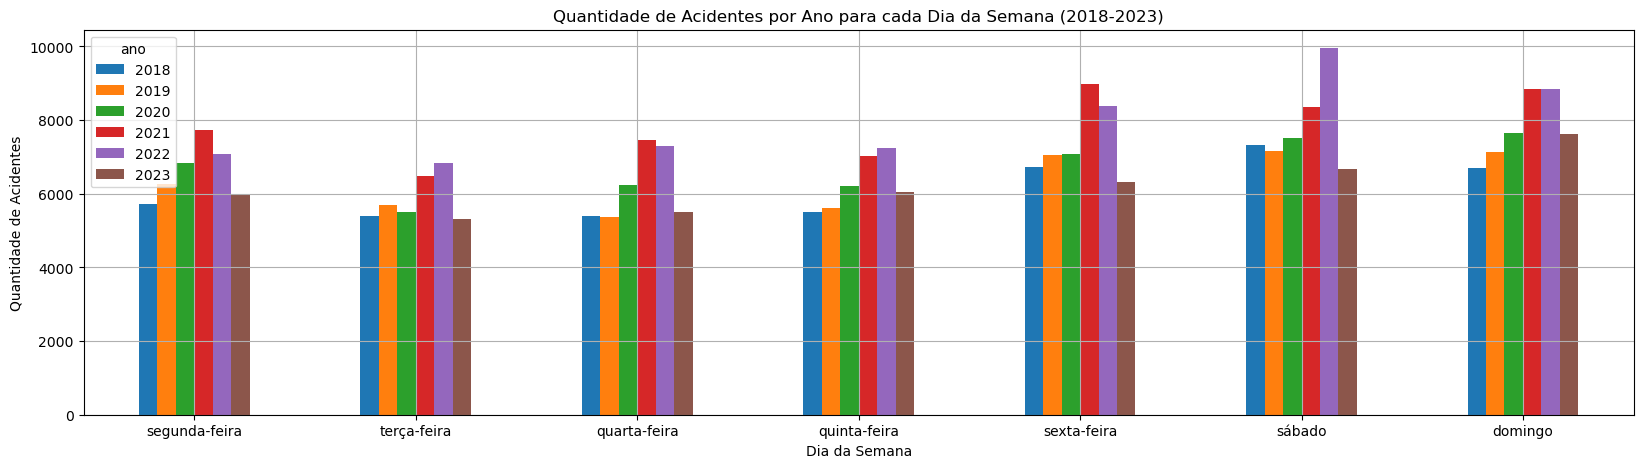

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


# Convertendo a coluna 'data_inversa' para datetime
df_copia['data_inversa'] = pd.to_datetime(df_copia['data_inversa'])

# Extraindo o ano da data
df_copia['ano'] = df_copia['data_inversa'].dt.year

# Filtrando os dados para o período de 2018 a 2023
df_copia = df_copia[df_copia['ano'].between(2018, 2023)]

# Agrupando os dados por dia da semana e ano e contando o número de acidentes
df_agrupado = df_copia.groupby(['dia_semana', 'ano']).size().unstack()

# Ordenando os dias da semana
order = ['segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira', 'sexta-feira', 'sábado', 'domingo']
df_agrupado = df_agrupado.loc[order]

# Criando o gráfico de barras agrupadas
df_agrupado.plot(kind='bar', figsize=(20, 5), rot=0)

plt.title('Quantidade de Acidentes por Ano para cada Dia da Semana (2018-2023)')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(rotation=0)  # Rotacionando os rótulos do eixo x
plt.grid()
plt.show()

   km  idade  ilesos  feridos_leves  feridos_graves  latitude  longitude  \
0 NaN   69.0     1.0            0.0             0.0       NaN        NaN   
1 NaN   69.0     1.0            0.0             0.0       NaN        NaN   
2 NaN   20.0     0.0            1.0             0.0       NaN        NaN   
3 NaN   50.0     1.0            0.0             0.0       NaN        NaN   
4 NaN   19.0     0.0            1.0             0.0       NaN        NaN   

   mortos  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


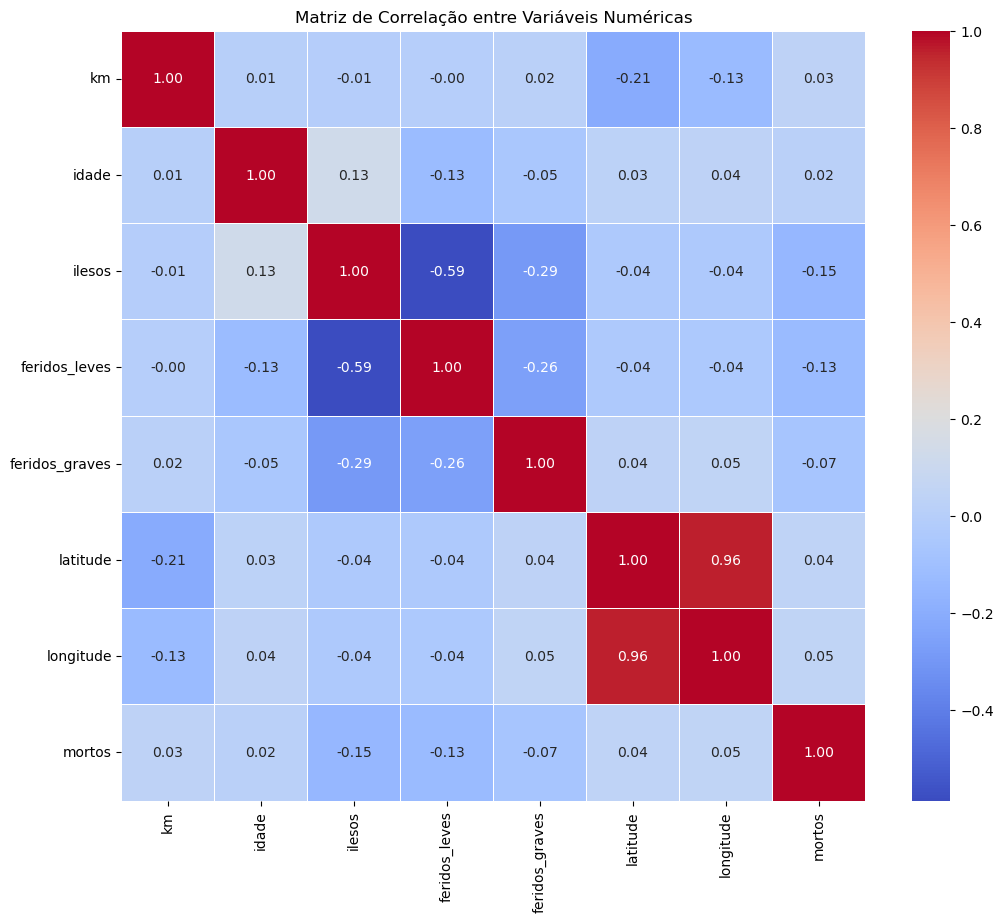

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Criando uma cópia do dataframe
dataset2 = df_copia.copy()

# Convertendo as colunas para os tipos de dados corretos
dataset2['br'] = pd.to_numeric(dataset2['br'], errors='coerce')
dataset2['km'] = pd.to_numeric(dataset2['km'], errors='coerce')
dataset2['idade'] = pd.to_numeric(dataset2['idade'], errors='coerce')
dataset2['ilesos'] = pd.to_numeric(dataset2['ilesos'], errors='coerce')
dataset2['feridos_leves'] = pd.to_numeric(dataset2['feridos_leves'], errors='coerce')
dataset2['feridos_graves'] = pd.to_numeric(dataset2['feridos_graves'], errors='coerce')
dataset2['latitude'] = pd.to_numeric(dataset2['latitude'], errors='coerce')
dataset2['longitude'] = pd.to_numeric(dataset2['longitude'], errors='coerce')
dataset2['mortos'] = pd.to_numeric(dataset2['mortos'], errors='coerce')

# Removendo colunas não numéricas da análise
colunas_nao_numericas = dataset2.select_dtypes(exclude=['float64', 'int64']).columns
dataset2 = dataset2.drop(columns=colunas_nao_numericas)

# Excluindo a coluna 'br'
dataset2 = dataset2.drop(columns=['br'])

# Visualizando as primeiras linhas do dataframe após as alterações
print(dataset2.head())

# Calculando a matriz de correlação
correlation_matrix = dataset2.corr()

# Plotando um heatmap para visualizar a correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()


      dia_semana   horario  uf     km   municipio  \
0  segunda-feira  02:30:00  SC   32,2   JOINVILLE   
1  segunda-feira  02:30:00  SC   32,2   JOINVILLE   
2  segunda-feira  01:40:00  RN  110,8  PARNAMIRIM   
3  segunda-feira  02:20:00  SC  348,1   JAGUARUNA   
4  segunda-feira  02:20:00  SC  348,1   JAGUARUNA   

                causa_acidente                tipo_acidente  \
0  Falta de Atenção à Condução    Saída de leito carroçável   
1  Falta de Atenção à Condução  Colisão com objeto estático   
2             Animais na Pista      Atropelamento de Animal   
3  Falta de Atenção à Condução             Colisão traseira   
4  Falta de Atenção à Condução             Colisão traseira   

  classificacao_acidente     fase_dia  sentido_via condicao_metereologica  \
0            Sem Vítimas  Plena Noite  Decrescente                  Chuva   
1            Sem Vítimas  Plena Noite  Decrescente                  Chuva   
2    Com Vítimas Feridas  Plena Noite    Crescente              Céu Cla

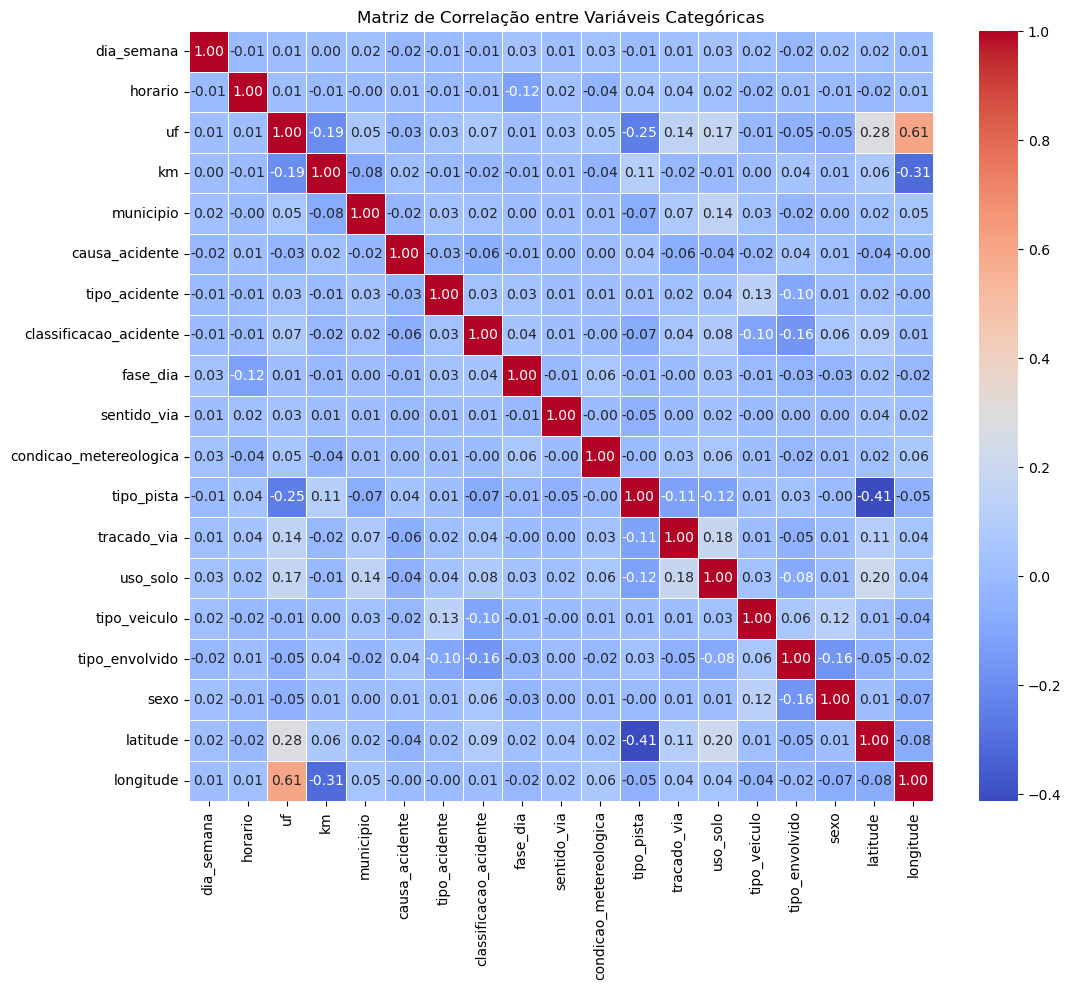

In [23]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Criando uma cópia do dataframe
dataset_categorico = df_copia.copy()

# Excluindo colunas não categóricas
colunas_categoricas = dataset_categorico.select_dtypes(include=['object']).columns
dataset_categorico = dataset_categorico[colunas_categoricas]

# Verificando se a coluna 'br' está presente antes de excluí-la
if 'br' in dataset_categorico.columns:
    dataset_categorico = dataset_categorico.drop(columns=['br'])

# Visualizando as primeiras linhas do dataframe após as alterações
print(dataset_categorico.head())

# Convertendo variáveis categóricas para numéricas usando Label Encoding
label_encoder = LabelEncoder()
dataset_categorico_encoded = dataset_categorico.apply(label_encoder.fit_transform)

# Calculando a matriz de correlação
correlation_matrix_categorica = dataset_categorico_encoded.corr()

# Plotando um heatmap para visualizar a correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_categorica, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Categóricas')
plt.show()



In [24]:
# Visualizando os valores possíveis e tipos nos datasets
print("Dataset Categórico Codificado:")
print(dataset_categorico_encoded.head())

print("\nDataset 2 (Variáveis Numéricas):")
print(dataset2.head())

print("\nDataset Categórico:")
print(dataset_categorico.head())


Dataset Categórico Codificado:
   dia_semana  horario  uf    km  municipio  causa_acidente  tipo_acidente  \
0           3      119   8  2391        131              38             18   
1           3      119   8  2391        131              38              5   
2           3       82   6   147        176               8              0   
3           3      114   8  2684        123              38             11   
4           3      114   8  2684        123              38             11   

   classificacao_acidente  fase_dia  sentido_via  condicao_metereologica  \
0                       2         2            1                       0   
1                       2         2            1                       0   
2                       1         2            0                       1   
3                       1         2            0                       1   
4                       1         2            0                       1   

   tipo_pista  tracado_via  uso_solo  tipo_

In [25]:
import pandas as pd

# df_copia é o DataFrame original
df_numericos = df_copia.select_dtypes(include=['float64', 'int64'])
df_categoricos = df_copia.select_dtypes(include=['object'])

# Renomeando a coluna 'semestre_ano' para 'mes_ano'
df_categoricos.rename(columns={'semestre_ano': 'ano_mes'}, inplace=True)


# Verifique se 'br' está presente em df_numericos
if 'br' in df_numericos.columns:
    # Converte 'br' para string
    df_numericos['br'] = df_numericos['br'].astype(str)

    # Adicione a coluna 'br' em df_categoricos
    df_categoricos['br'] = df_numericos.pop('br')

# Confira as mudanças
print("df_numericos após remoção de 'br':")
print(df_numericos.head())

print("\ndf_categoricos após adição de 'br':")
print(df_categoricos.head())



df_numericos após remoção de 'br':
   idade  ilesos  feridos_leves  feridos_graves  mortos
0   69.0     1.0            0.0             0.0     0.0
1   69.0     1.0            0.0             0.0     0.0
2   20.0     0.0            1.0             0.0     0.0
3   50.0     1.0            0.0             0.0     0.0
4   19.0     0.0            1.0             0.0     0.0

df_categoricos após adição de 'br':
      dia_semana   horario  uf     km   municipio  \
0  segunda-feira  02:30:00  SC   32,2   JOINVILLE   
1  segunda-feira  02:30:00  SC   32,2   JOINVILLE   
2  segunda-feira  01:40:00  RN  110,8  PARNAMIRIM   
3  segunda-feira  02:20:00  SC  348,1   JAGUARUNA   
4  segunda-feira  02:20:00  SC  348,1   JAGUARUNA   

                causa_acidente                tipo_acidente  \
0  Falta de Atenção à Condução    Saída de leito carroçável   
1  Falta de Atenção à Condução  Colisão com objeto estático   
2             Animais na Pista      Atropelamento de Animal   
3  Falta de Atenção à

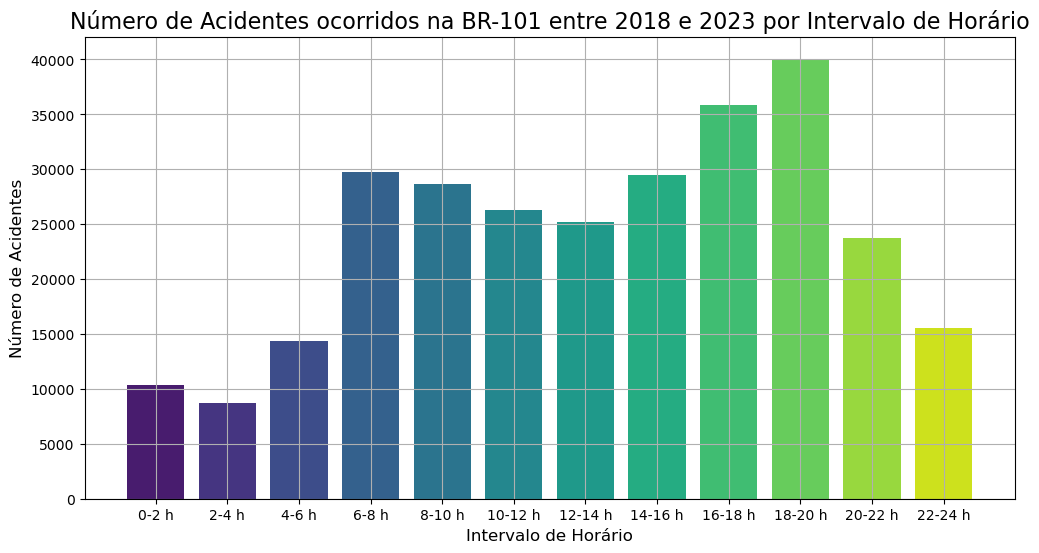

In [26]:
# Convertendo 'horario' para o formato de datetime
df_categoricos['horario'] = pd.to_datetime(df_categoricos['horario'], format='%H:%M:%S')

# Criando uma coluna para representar os intervalos de horário
df_categoricos['intervalo_horario'] = pd.cut(df_categoricos['horario'].dt.hour,
                                             bins=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24],
                                             labels=['0-2 h', '2-4 h', '4-6 h', '6-8 h', '8-10 h', '10-12 h', '12-14 h', '14-16 h', '16-18 h', '18-20 h', '20-22 h', '22-24 h'],
                                             include_lowest=True,
                                             right=False)

# Contagem de acidentes por intervalo de horário
acidentes_por_intervalo = df_categoricos['intervalo_horario'].value_counts().sort_index()

# Plotando o gráfico de barras
plt.figure(figsize=(12, 6))
bar_plot = plt.bar(acidentes_por_intervalo.index, acidentes_por_intervalo.values, color=sns.color_palette('viridis', len(acidentes_por_intervalo)))

# Ajustando o espaço entre as barras e as datas
plt.xlabel('Intervalo de Horário', fontsize=12)
plt.ylabel('Número de Acidentes', fontsize=12)
plt.title('Número de Acidentes ocorridos na BR-101 entre 2018 e 2023 por Intervalo de Horário', fontsize=16)

# Ajustando o tamanho da fonte nos eixos x e y
plt.tick_params(axis='both', which='major', labelsize=10)
plt.grid()
plt.show()

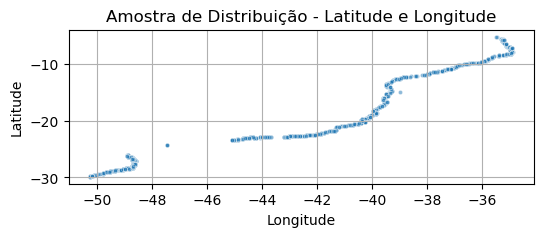

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Amostragem aleatória de 5% dos dados para tornar a visualização mais leve
sampled_data = df_copia.sample(frac=0.05, random_state=42)

# Convertendo as colunas de latitude e longitude para tipos numéricos
sampled_data['latitude'] = pd.to_numeric(sampled_data['latitude'], errors='coerce')
sampled_data['longitude'] = pd.to_numeric(sampled_data['longitude'], errors='coerce')

# Removendo linhas com valores nulos nas colunas de latitude e longitude
sampled_data = sampled_data.dropna(subset=['latitude', 'longitude'])

# Criar um gráfico de dispersão
plt.figure(figsize=(6, 2))
sns.scatterplot(x='longitude', y='latitude', data=sampled_data, alpha=0.5, marker='.')
plt.title('Amostra de Distribuição - Latitude e Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

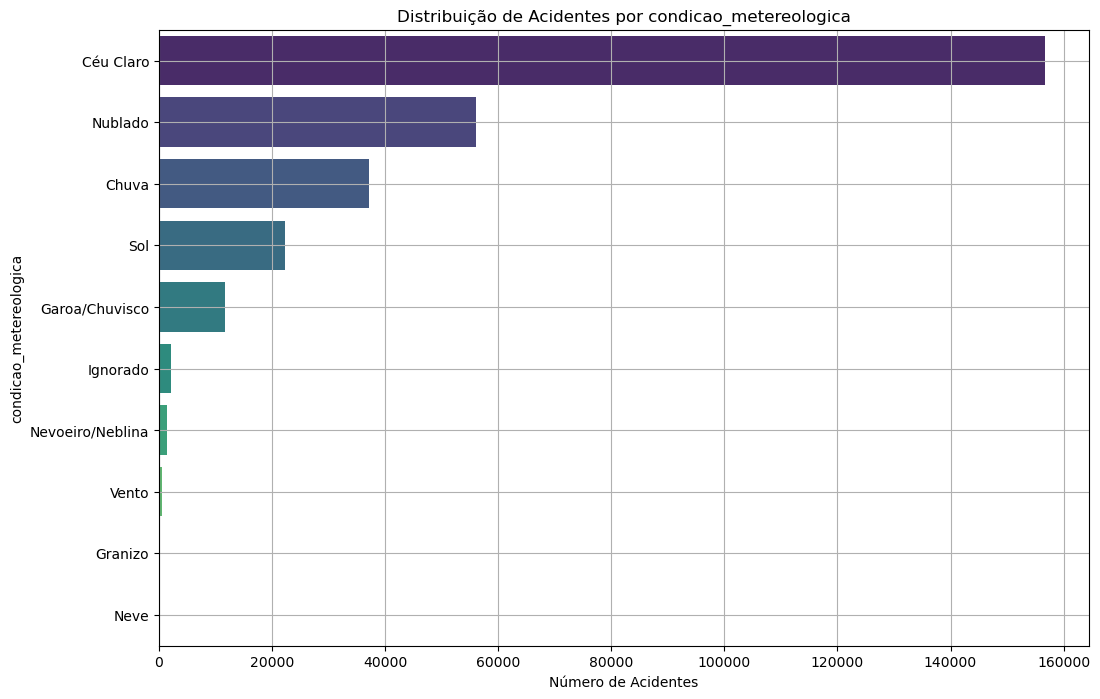

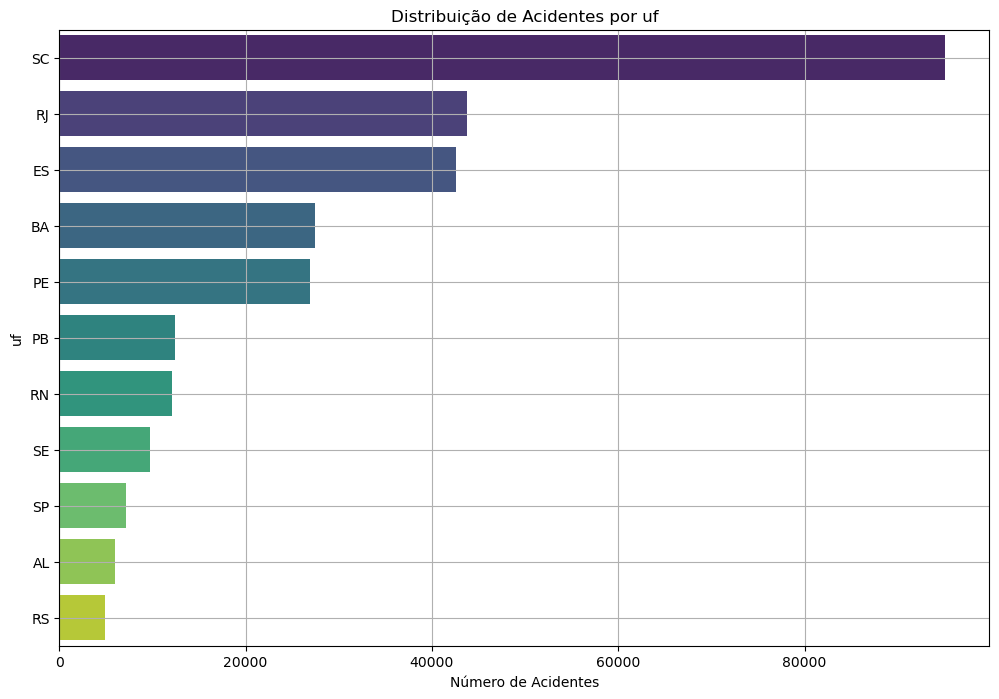

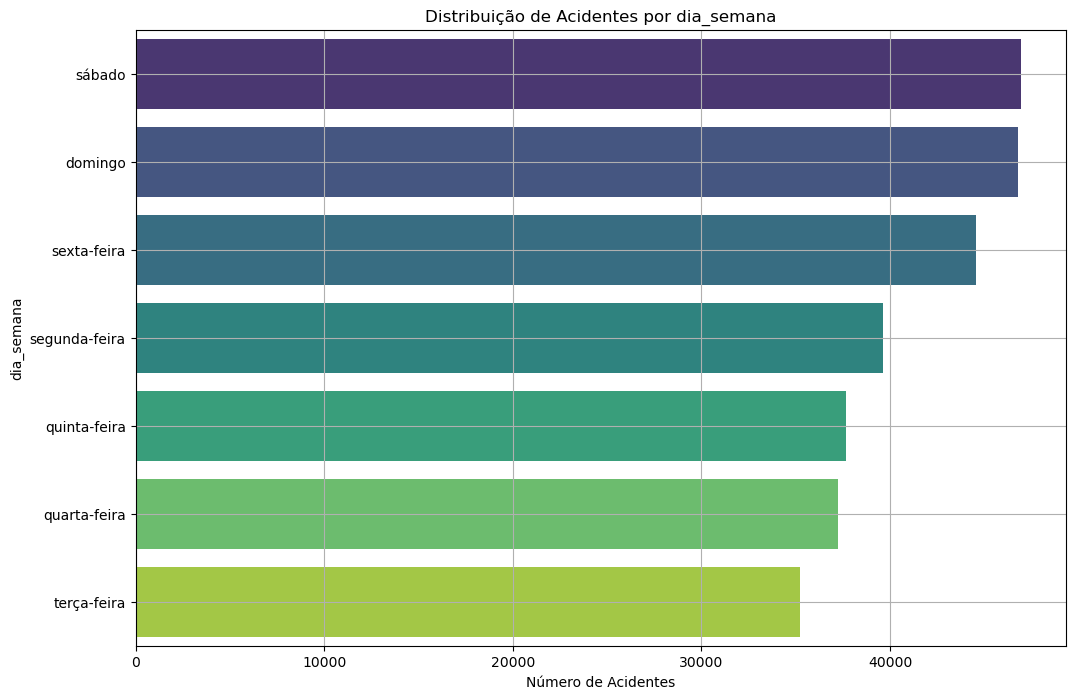

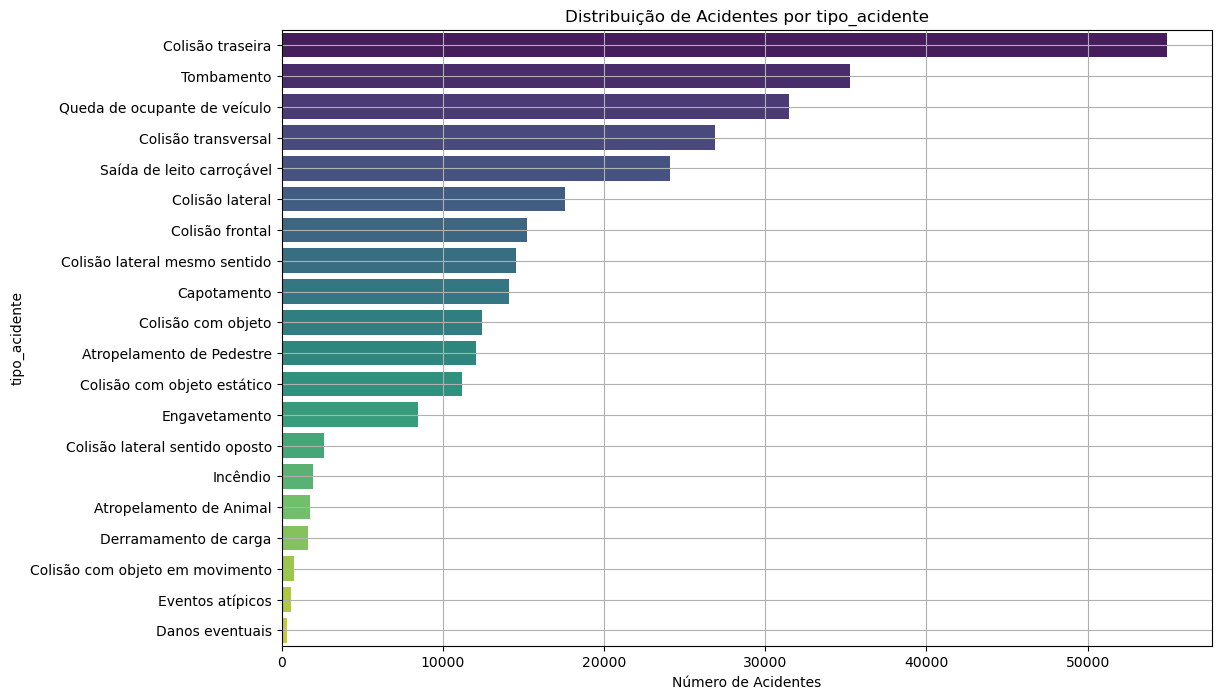

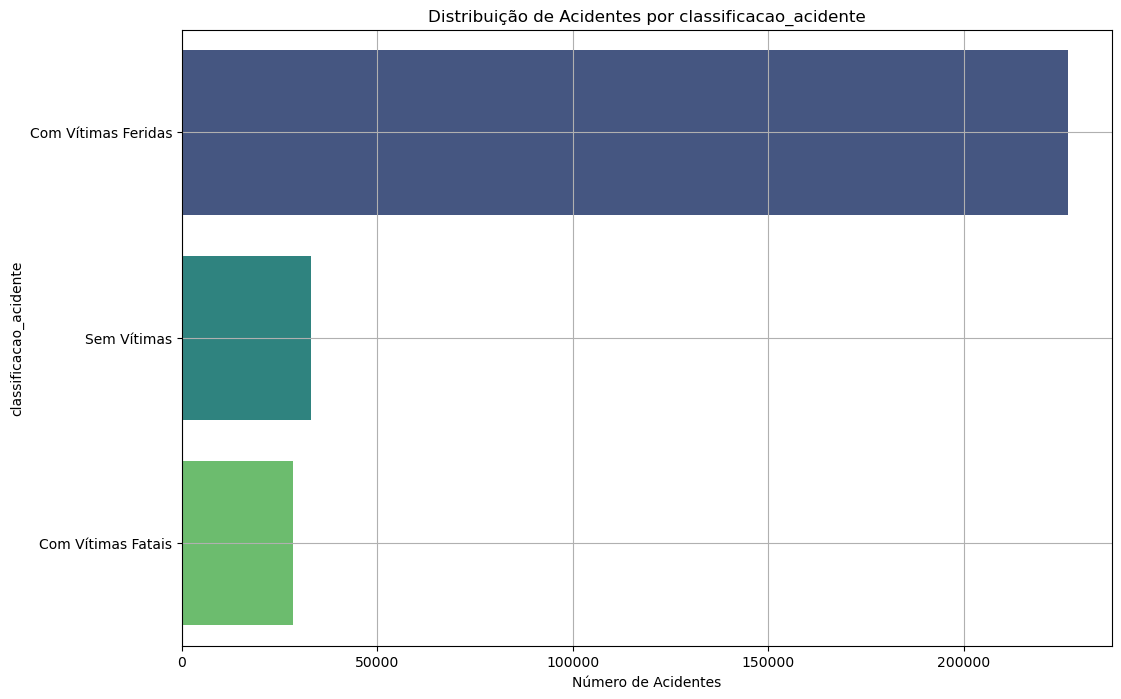

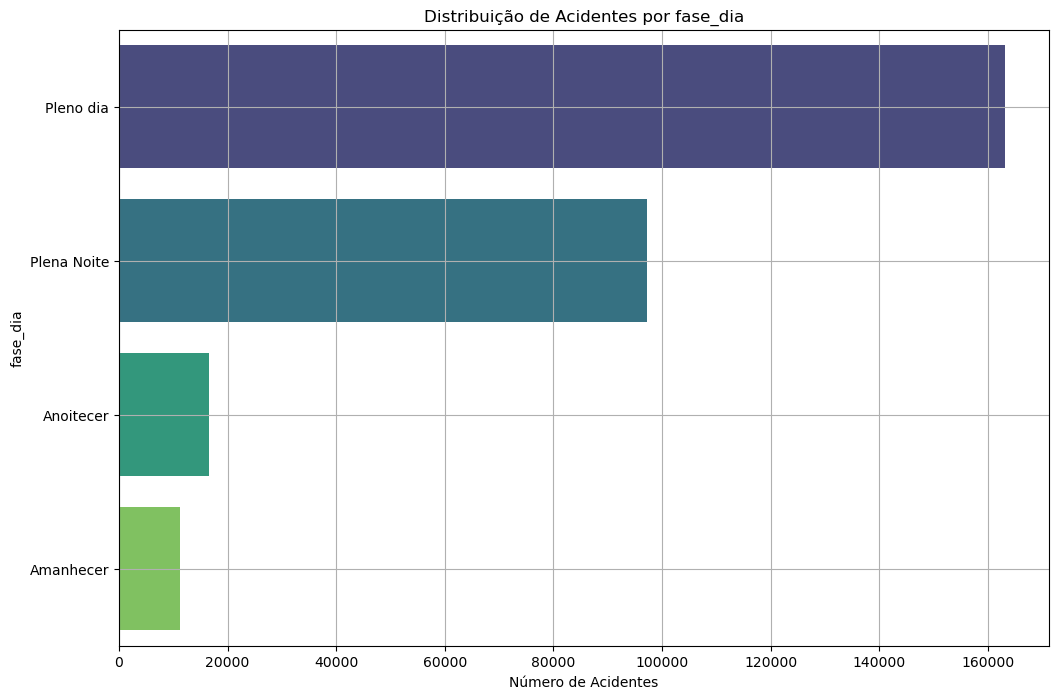

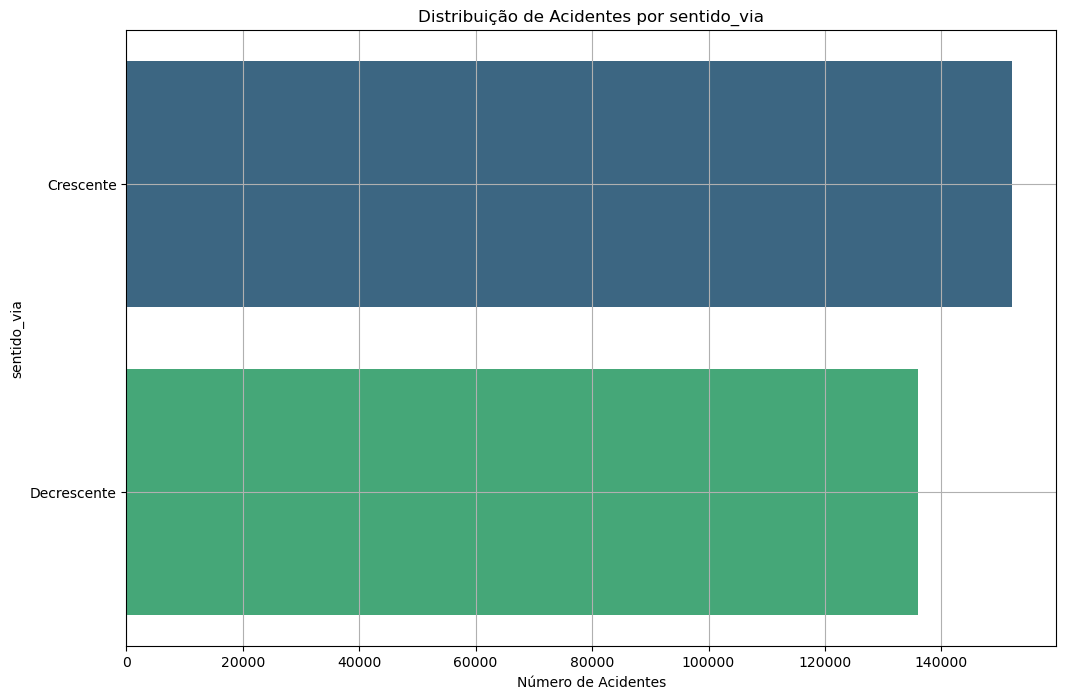

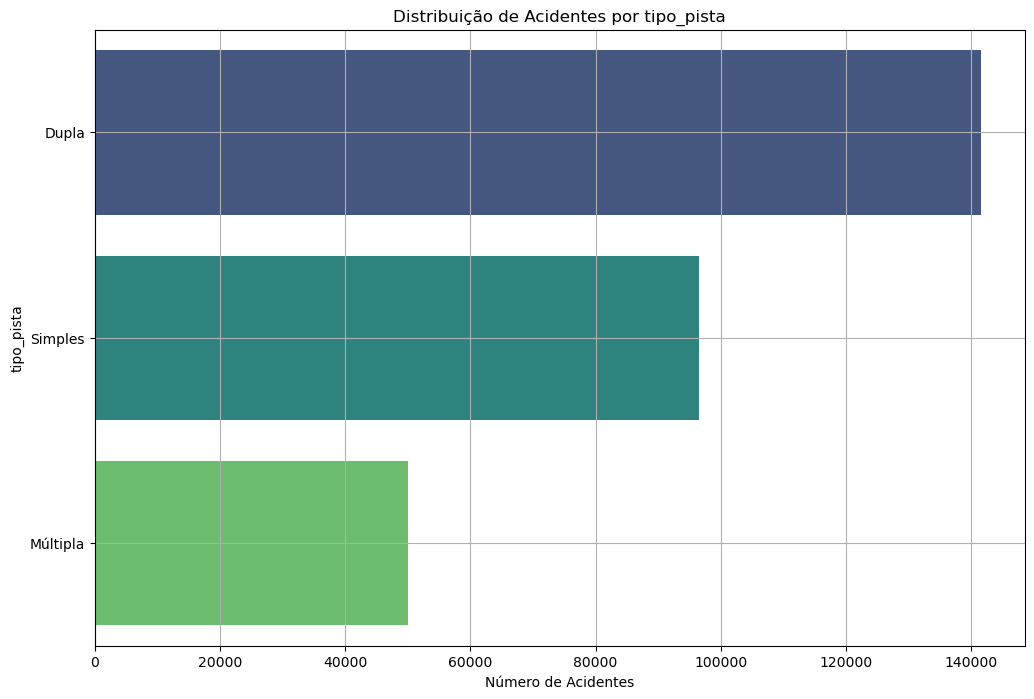

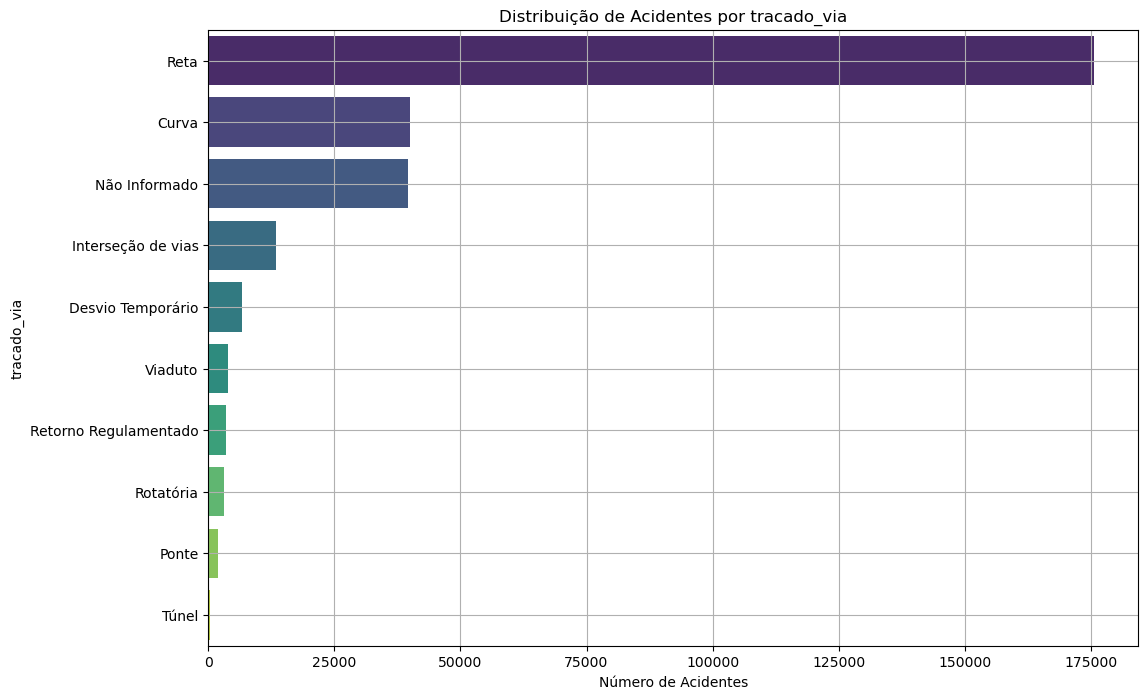

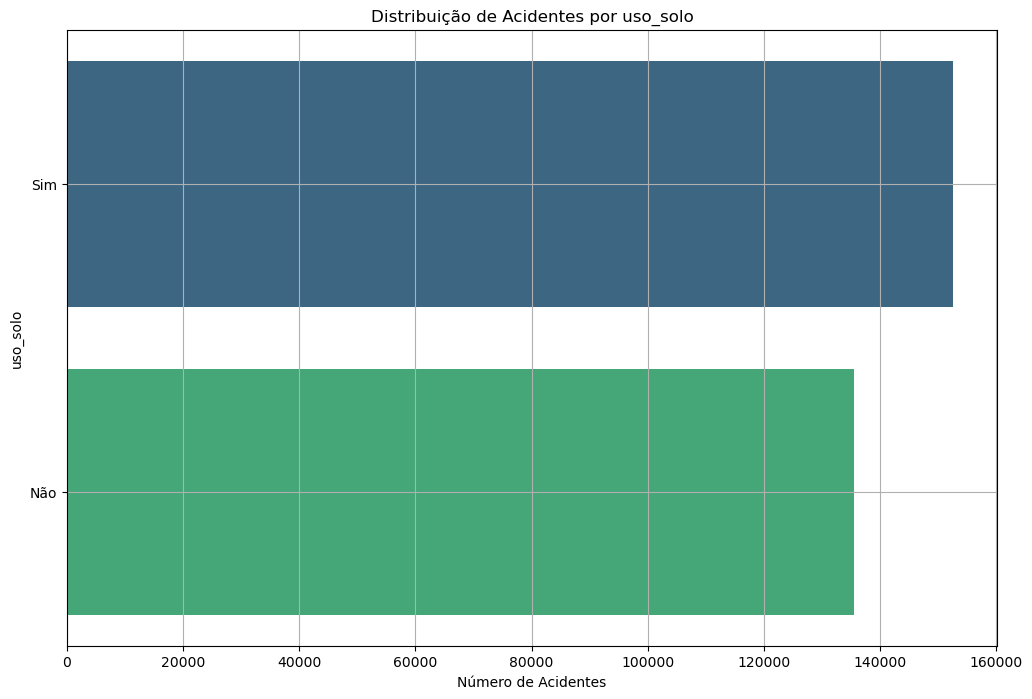

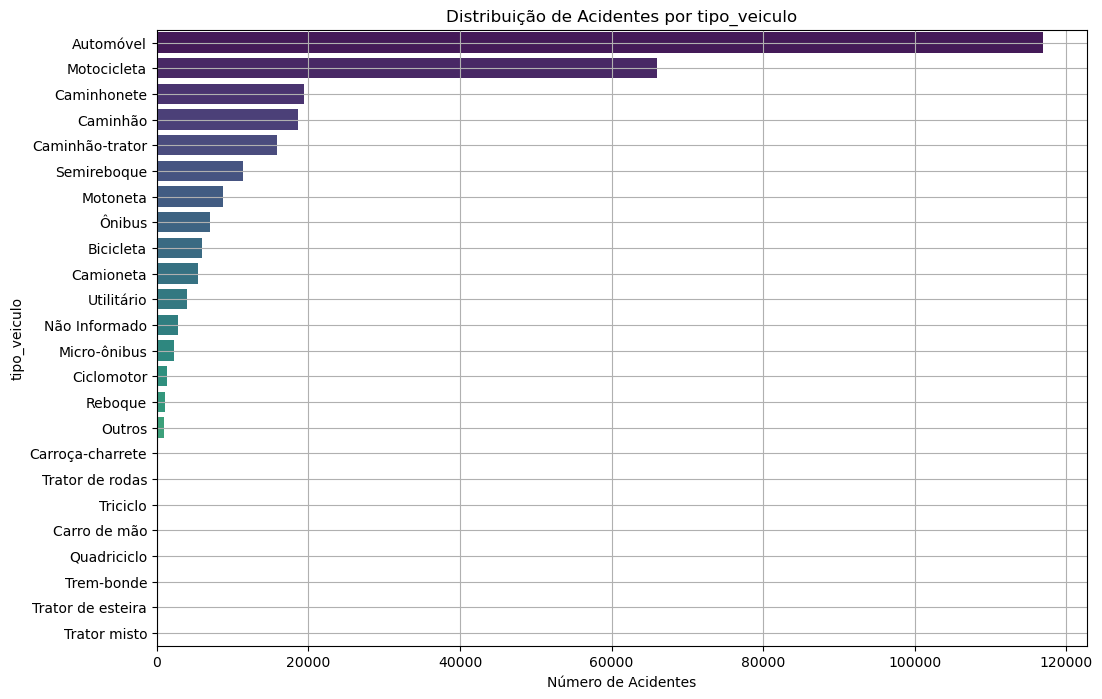

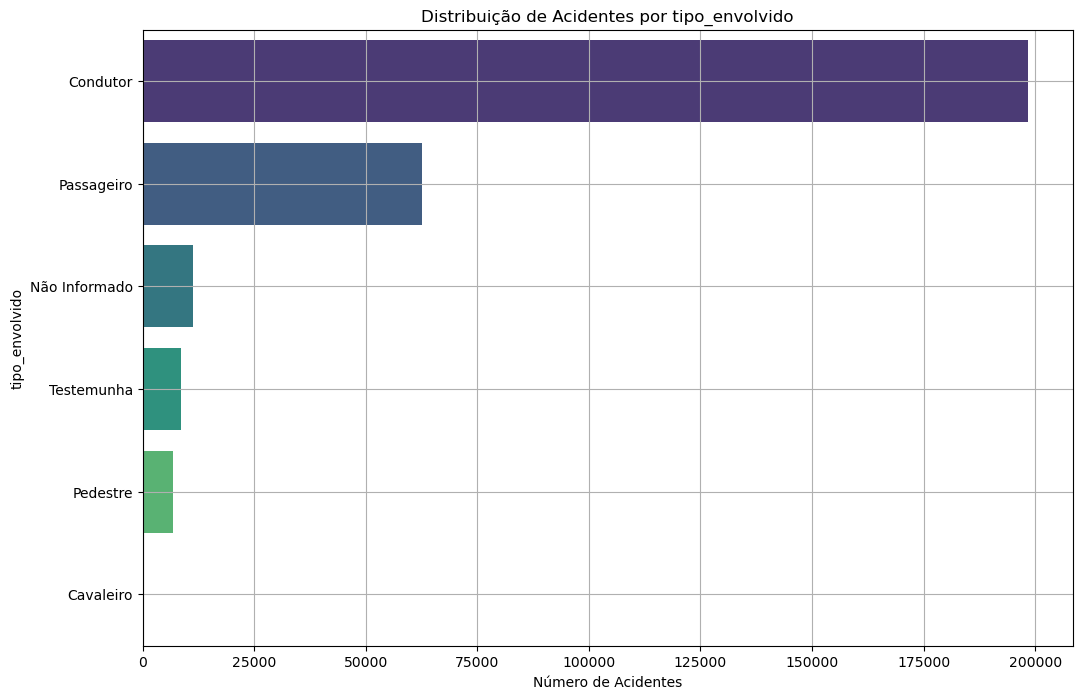

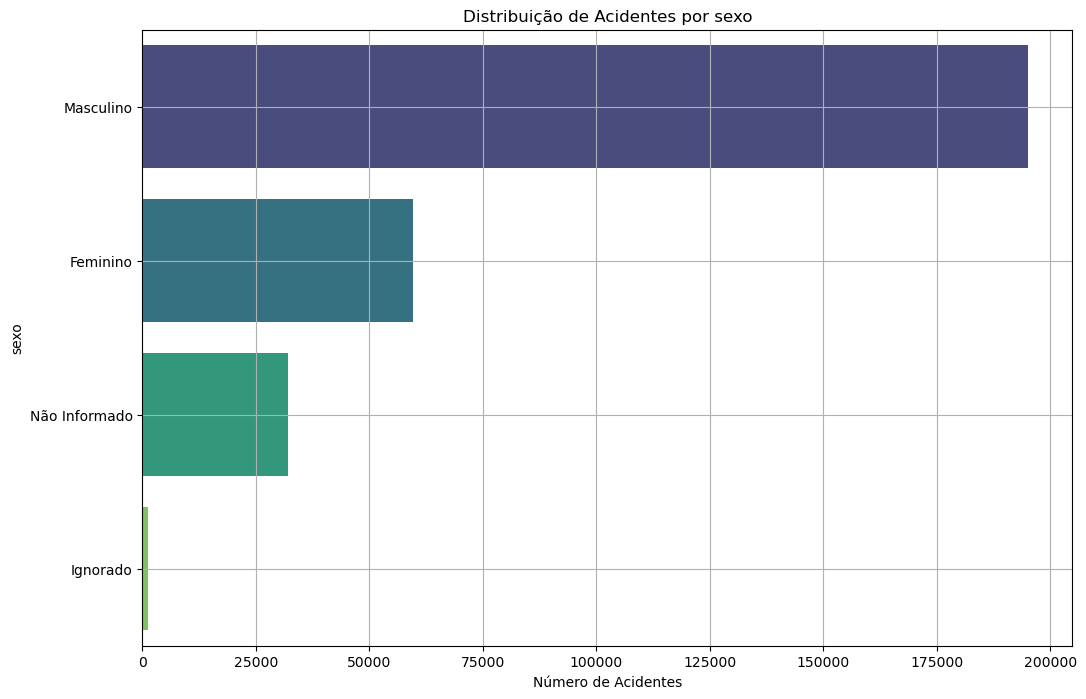

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Função para plotar gráficos categóricos
def plotar_grafico_categorico(coluna, dataframe):
    plt.figure(figsize=(12, 8))
    sns.countplot(y=coluna, data=dataframe, order=dataframe[coluna].value_counts().index, palette='viridis')
    plt.title(f'Distribuição de Acidentes por {coluna}')
    plt.xlabel('Número de Acidentes')
    plt.ylabel(coluna)
    plt.grid()
    plt.show()

# Lista das colunas categóricas a serem analisadas
colunas_categoricas = ['condicao_metereologica','uf','dia_semana', 'tipo_acidente',
                       'classificacao_acidente', 'fase_dia', 'sentido_via',
                       'tipo_pista', 'tracado_via', 'uso_solo', 'tipo_veiculo', 'tipo_envolvido', 'sexo']

# Loop para gerar os gráficos
for coluna in colunas_categoricas:
    plotar_grafico_categorico(coluna, df_categoricos)


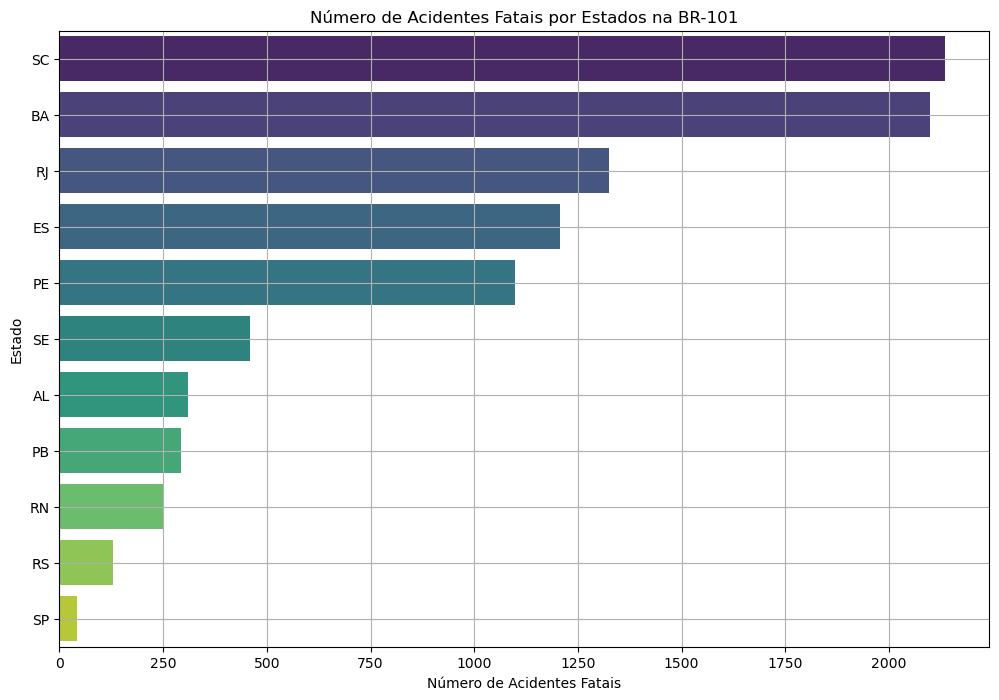

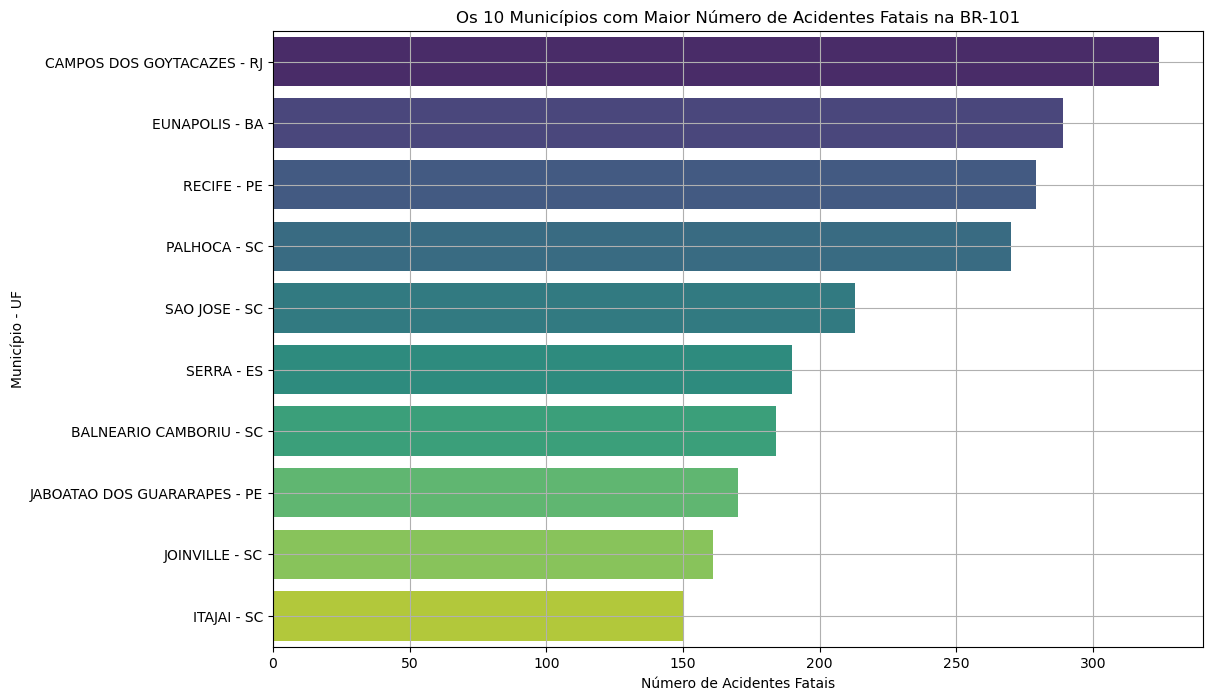

In [33]:
# Filtrando apenas os acidentes fatais na BR-101
acidentes_fatais = df_copia[df_copia['mortos'] > 0]

# Gráfico de acidentes fatais na BR-101 por estados 
plt.figure(figsize=(12, 8))
top_estados = acidentes_fatais['uf'].value_counts().nlargest(12)
sns.barplot(x=top_estados.values, y=top_estados.index, palette='viridis')
plt.title('Número de Acidentes Fatais por Estados na BR-101')
plt.xlabel('Número de Acidentes Fatais')
plt.ylabel('Estado')
plt.grid()
plt.show()

# Gráfico de acidentes fatais por município-unidade federativa (10 maiores)
plt.figure(figsize=(12, 8))
top_municipios_uf = acidentes_fatais.groupby(['municipio', 'uf']).size().nlargest(10)
sns.barplot(x=top_municipios_uf.values, y=[f'{mun} - {uf}' for mun, uf in top_municipios_uf.index], palette='viridis')
plt.title('Os 10 Municípios com Maior Número de Acidentes Fatais na BR-101')
plt.xlabel('Número de Acidentes Fatais')
plt.ylabel('Município - UF')
plt.grid()
plt.show()


##### Gráfico de barras para mostrar a quantidade de acidentes por ano, com cores diferentes para os sentidos (crescente e decrescente) da rodovia BR-101 no local onde ocorreu o registro de acidente:  


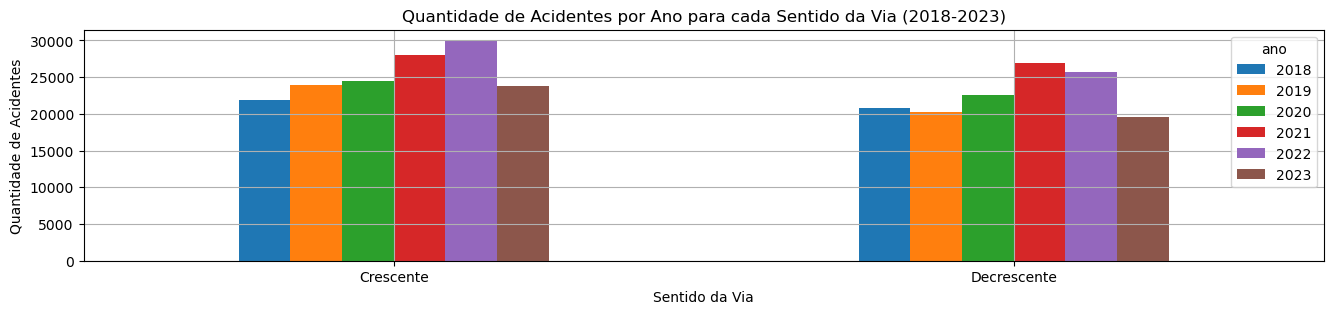

In [30]:

import pandas as pd
import matplotlib.pyplot as plt


# Convertendo a coluna 'data_inversa' para datetime
df_copia['data_inversa'] = pd.to_datetime(df_copia['data_inversa'])

# Extraindo o ano da data
df_copia['ano'] = df_copia['data_inversa'].dt.year

# Filtrando os dados para o período de 2018 a 2023
df_copia = df_copia[df_copia['ano'].between(2018, 2023)]

# Agrupando os dados por 'sentido_via' e ano e contando o número de acidentes
df_agrupado = df_copia.groupby(['sentido_via', 'ano']).size().unstack()

# Criando o gráfico de barras agrupadas para 'sentido_via'
df_agrupado.plot(kind='bar', figsize=(16, 3), rot=0)

plt.title('Quantidade de Acidentes por Ano para cada Sentido da Via (2018-2023)')
plt.xlabel('Sentido da Via')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(rotation=0)  # Rotacionando os rótulos do eixo x
plt.grid()
plt.show()


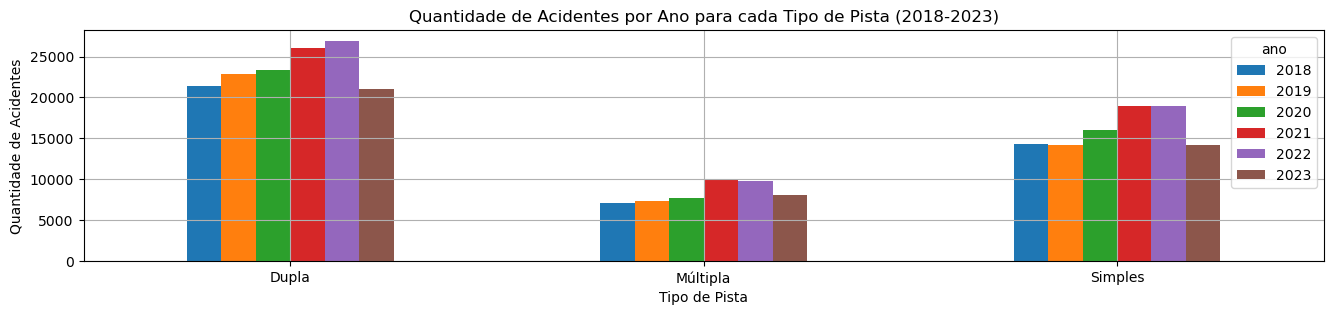

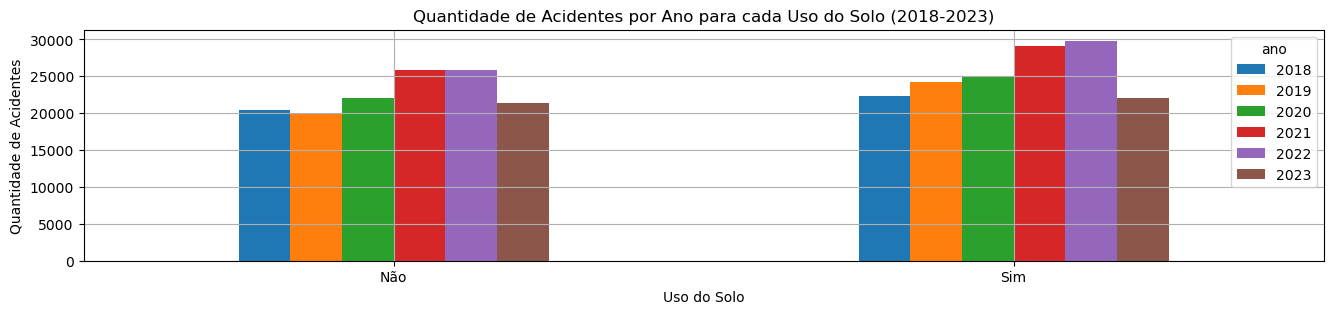

In [38]:
import pandas as pd
import matplotlib.pyplot as plt


# Convertendo a coluna 'data_inversa' para datetime
df_copia['data_inversa'] = pd.to_datetime(df_copia['data_inversa'])

# Extraindo o ano da data
df_copia['ano'] = df_copia['data_inversa'].dt.year

# Filtrando os dados para o período de 2018 a 2023
df_copia = df_copia[df_copia['ano'].between(2018, 2023)]

# Agrupando os dados por 'tipo_pista' e ano e contando o número de acidentes
df_agrupado = df_copia.groupby(['tipo_pista', 'ano']).size().unstack()

# Criando o gráfico de barras agrupadas para 'tipo_pista'
df_agrupado.plot(kind='bar', figsize=(16, 3), rot=0)

plt.title('Quantidade de Acidentes por Ano para cada Tipo de Pista (2018-2023)')
plt.xlabel('Tipo de Pista')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(rotation=0)  # Rotacionando os rótulos do eixo x
plt.grid()
plt.show()

# Agrupando os dados por 'uso_solo' e ano e contando o número de acidentes
df_agrupado = df_copia.groupby(['uso_solo', 'ano']).size().unstack()

# Criando o gráfico de barras agrupadas para 'uso_solo'
df_agrupado.plot(kind='bar', figsize=(16, 3), rot=0)

plt.title('Quantidade de Acidentes por Ano para cada Uso do Solo (2018-2023)')
plt.xlabel('Uso do Solo')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(rotation=0)  # Rotacionando os rótulos do eixo x
plt.grid()
plt.show()


In [ ]:
#15 principais causa_acidente 

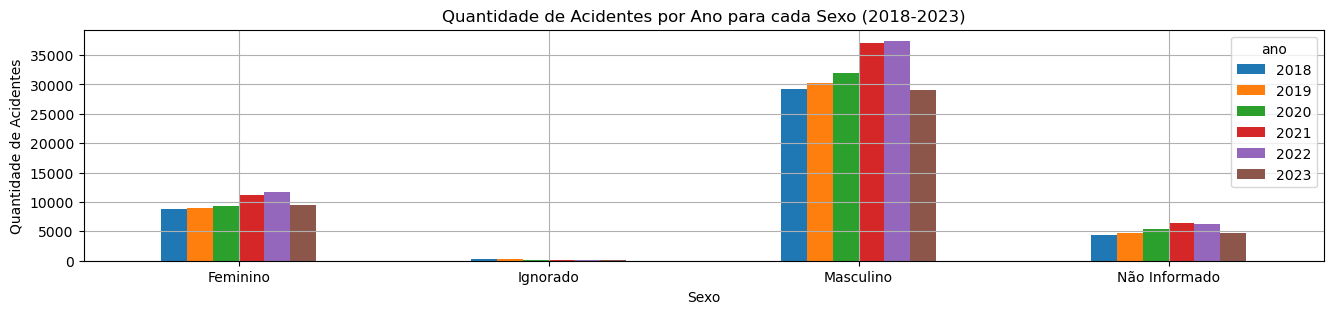

In [41]:
import pandas as pd
import matplotlib.pyplot as plt


# Convertendo a coluna 'data_inversa' para datetime
df_copia['data_inversa'] = pd.to_datetime(df_copia['data_inversa'])

# Extraindo o ano da data
df_copia['ano'] = df_copia['data_inversa'].dt.year

# Filtrando os dados para o período de 2018 a 2023
df_copia = df_copia[df_copia['ano'].between(2018, 2023)]

# Agrupando os dados por 'sexo' e ano e contando o número de acidentes
df_agrupado = df_copia.groupby(['sexo', 'ano']).size().unstack()

# Criando o gráfico de barras agrupadas para 'sexo'
df_agrupado.plot(kind='bar', figsize=(16, 3), rot=0)

plt.title('Quantidade de Acidentes por Ano para cada Sexo (2018-2023)')
plt.xlabel('Sexo')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(rotation=0)  # Rotacionando os rótulos do eixo x
plt.grid()
plt.show()

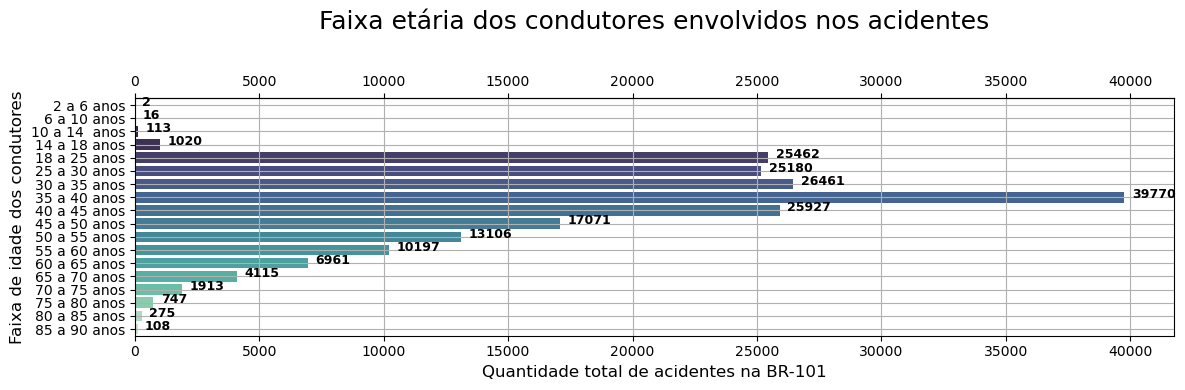

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Criar um dataframe com as idades dos condutores envolvidos em acidentes
df_faixa_etaria = pd.DataFrame(df_copia['idade'][(df_copia['tipo_envolvido'] == 'Condutor') & (df_copia['idade'] > 2) & (df_copia['idade'] < 91)])

# Definir os limites das faixas etárias
grupos = [2,6,10,14,18,25,30,35,40,45,50,55,60,65,70,75,80,85,90]

# Agrupar as idades nas faixas etárias definidas
grupos_idades = pd.cut(list(df_faixa_etaria['idade']), grupos)

# Contar a quantidade de acidentes por faixa etária
df_faixa_etaria = pd.DataFrame(grupos_idades.value_counts())
df_faixa_etaria.columns =['quantidade']
df_faixa_etaria.index = ['2 a 6 anos','6 a 10 anos', '10 a 14  anos','14 a 18 anos','18 a 25 anos','25 a 30 anos','30 a 35 anos','35 a 40 anos',
                        '40 a 45 anos','45 a 50 anos','50 a 55 anos','55 a 60 anos','60 a 65 anos',
                        '65 a 70 anos','70 a 75 anos','75 a 80 anos','80 a 85 anos','85 a 90 anos']

# Configurar o tamanho da figura
plt.figure(figsize=(12, 4))

# Plotar o gráfico de barras com espaçamento ajustado entre as barras
ax = sns.barplot(x='quantidade', y=df_faixa_etaria.index, data=df_faixa_etaria, palette='mako', saturation=0.75)

# Configurar o título e os rótulos dos eixos
ax.set_title('Faixa etária dos condutores envolvidos nos acidentes', fontsize=18, pad=50)
ax.set_ylabel('Faixa de idade dos condutores', fontsize=12)
ax.set_xlabel('Quantidade total de acidentes na BR-101', fontsize=12)
ax.secondary_xaxis('top')

# Adicionar anotações ao gráfico
ax.annotate(' ', xy=(850, 80), xycoords='figure pixels')

# Adicionar a quantidade de acidentes em cada barra
for i, value in enumerate(df_faixa_etaria['quantidade']):
    ax.text(value + 300, i + 0.05, "{0:.0f}".format(value), color='black', fontweight='bold', fontsize=9)

# Configurar o tamanho dos rótulos dos eixos
ax.tick_params(axis='both', which='major', labelsize=10)

# Mostrar o gráfico
plt.grid()
plt.tight_layout()  # Ajustar layout para evitar cortar partes do gráfico
plt.show()


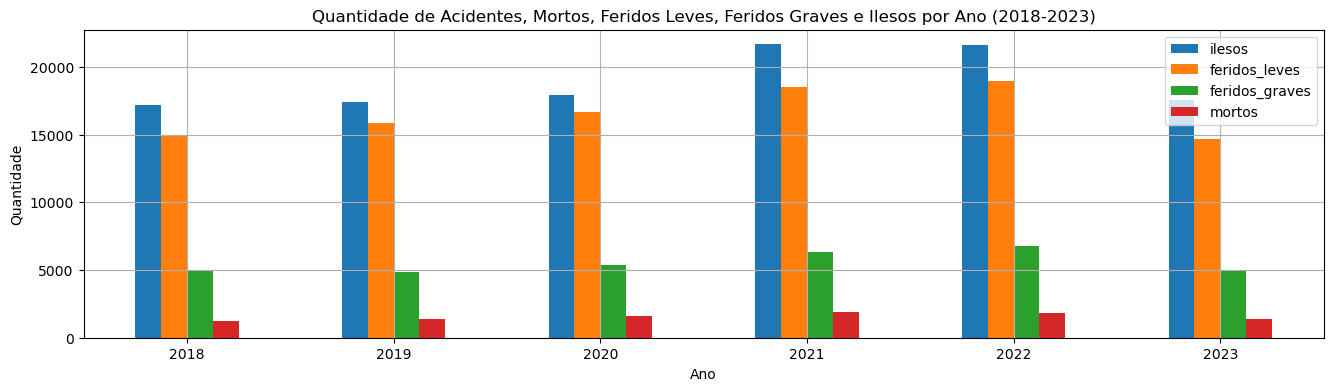

In [43]:
import pandas as pd
import matplotlib.pyplot as plt


# Convertendo a coluna 'data_inversa' para datetime
df_copia['data_inversa'] = pd.to_datetime(df_copia['data_inversa'])

# Extraindo o ano da data
df_copia['ano'] = df_copia['data_inversa'].dt.year

# Filtrando os dados para o período de 2018 a 2023
df_copia = df_copia[df_copia['ano'].between(2018, 2023)]

# Agrupando os dados por ano e somando as quantidades
df_agrupado = df_copia.groupby('ano')[['ilesos', 'feridos_leves', 'feridos_graves', 'mortos']].sum()

# Criando o gráfico de barras agrupadas
df_agrupado.plot(kind='bar', figsize=(16, 4), rot=0)

plt.title('Quantidade de Acidentes, Mortos, Feridos Leves, Feridos Graves e Ilesos por Ano (2018-2023)')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)  # Rotacionando os rótulos do eixo x
plt.grid()
plt.show()


##### Quantidade de ocorrência de acidentes de trânsito separado por cada causa de acidente na BR-101:


#### Mapa de Calor: gráfico de frequência cruzada (crosstab) entre 'dia_semana' e 'causa_acidente'

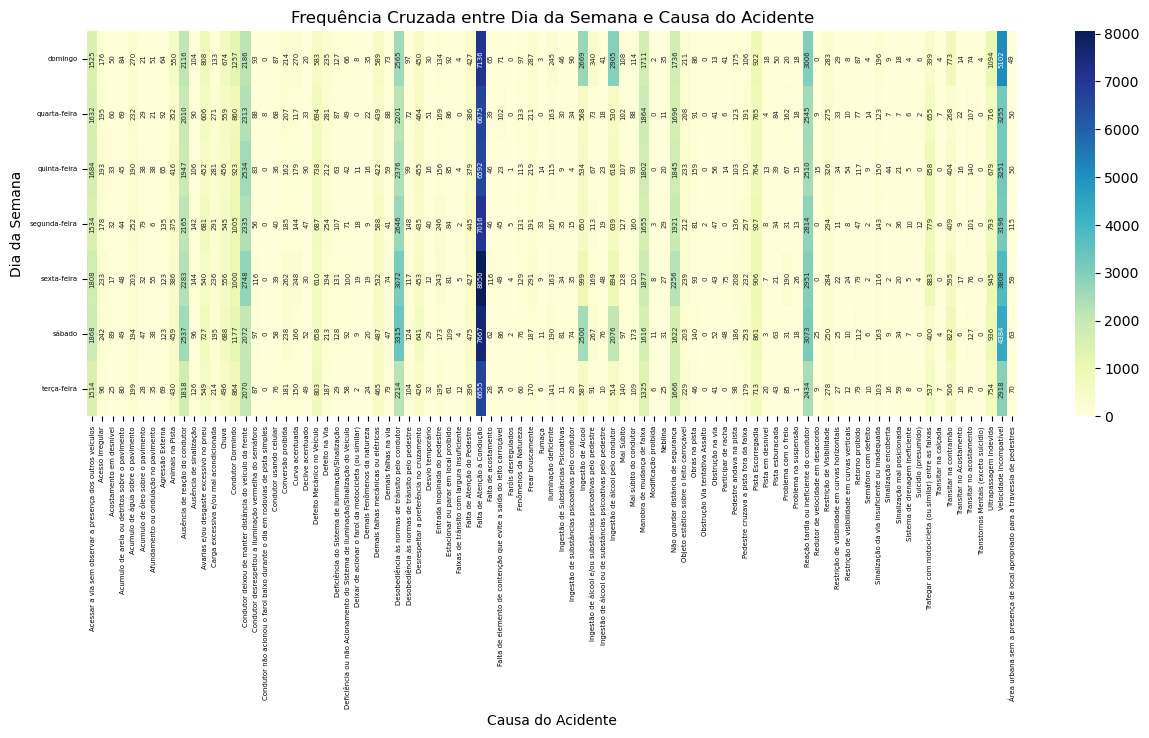

In [32]:
# Exemplo de gráfico de frequência cruzada (crosstab) entre 'dia_semana' e 'causa_acidente'
cross_tab = pd.crosstab(df_copia['dia_semana'], df_copia['causa_acidente'])

# Criar uma figura com um subplot para o mapa de calor
plt.figure(figsize=(15, 5))

# Plotar o mapa de calor
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d', annot_kws={'size': 5, 'rotation': 90})

plt.title('Frequência Cruzada entre Dia da Semana e Causa do Acidente')

# Usar o parâmetro yticklabels para passar os nomes das variáveis como os nomes das categorias do eixo y
plt.yticks(ticks=np.arange(0.5, len(cross_tab.index), 1), labels=cross_tab.index, rotation=0, fontsize=5)  # Ajuste o tamanho da fonte conforme necessário

# Usar o parâmetro xticklabels para passar os nomes das variáveis como os nomes das categorias do eixo x
plt.xticks(ticks=np.arange(0.5, len(cross_tab.columns), 1), labels=cross_tab.columns, rotation=90, fontsize=5)  # Ajuste o tamanho da fonte conforme necessário

plt.xlabel('Causa do Acidente')
plt.ylabel('Dia da Semana')

plt.show()
